# Example of investigating a single round

This notebook shows an example usage if only a single round is to be registered.

## Imports

In [1]:
from situr.image import SituImage
from situr.registration import PeakFinderDifferenceOfGaussian
from situr.registration import FilterregRegistrationFunction, SituImageChannelRegistration

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Creating the image

In [2]:
situ_img = SituImage([['./artificial_img/round_0/channel_0.tif'], ['./artificial_img/round_0/channel_1.tif']])

## Creating a peak finder 

Here we create a peak finder and display the shape of the number of found peaks.

In [3]:
peak_finder = PeakFinderDifferenceOfGaussian(threshold=0.01)
peaks = peak_finder.get_channel_peaks(situ_img, 0)
peaks.shape

(8, 2)

## Visualising the found peaks

The found peaks (in channel 0) are visualised now (note: this step does not require the run of get_channel_peaks). This is done to ensure that the results of the found peak match what we expect. If it does not we can use another peak finder or we can tune the parameters until the result is satisfactory.

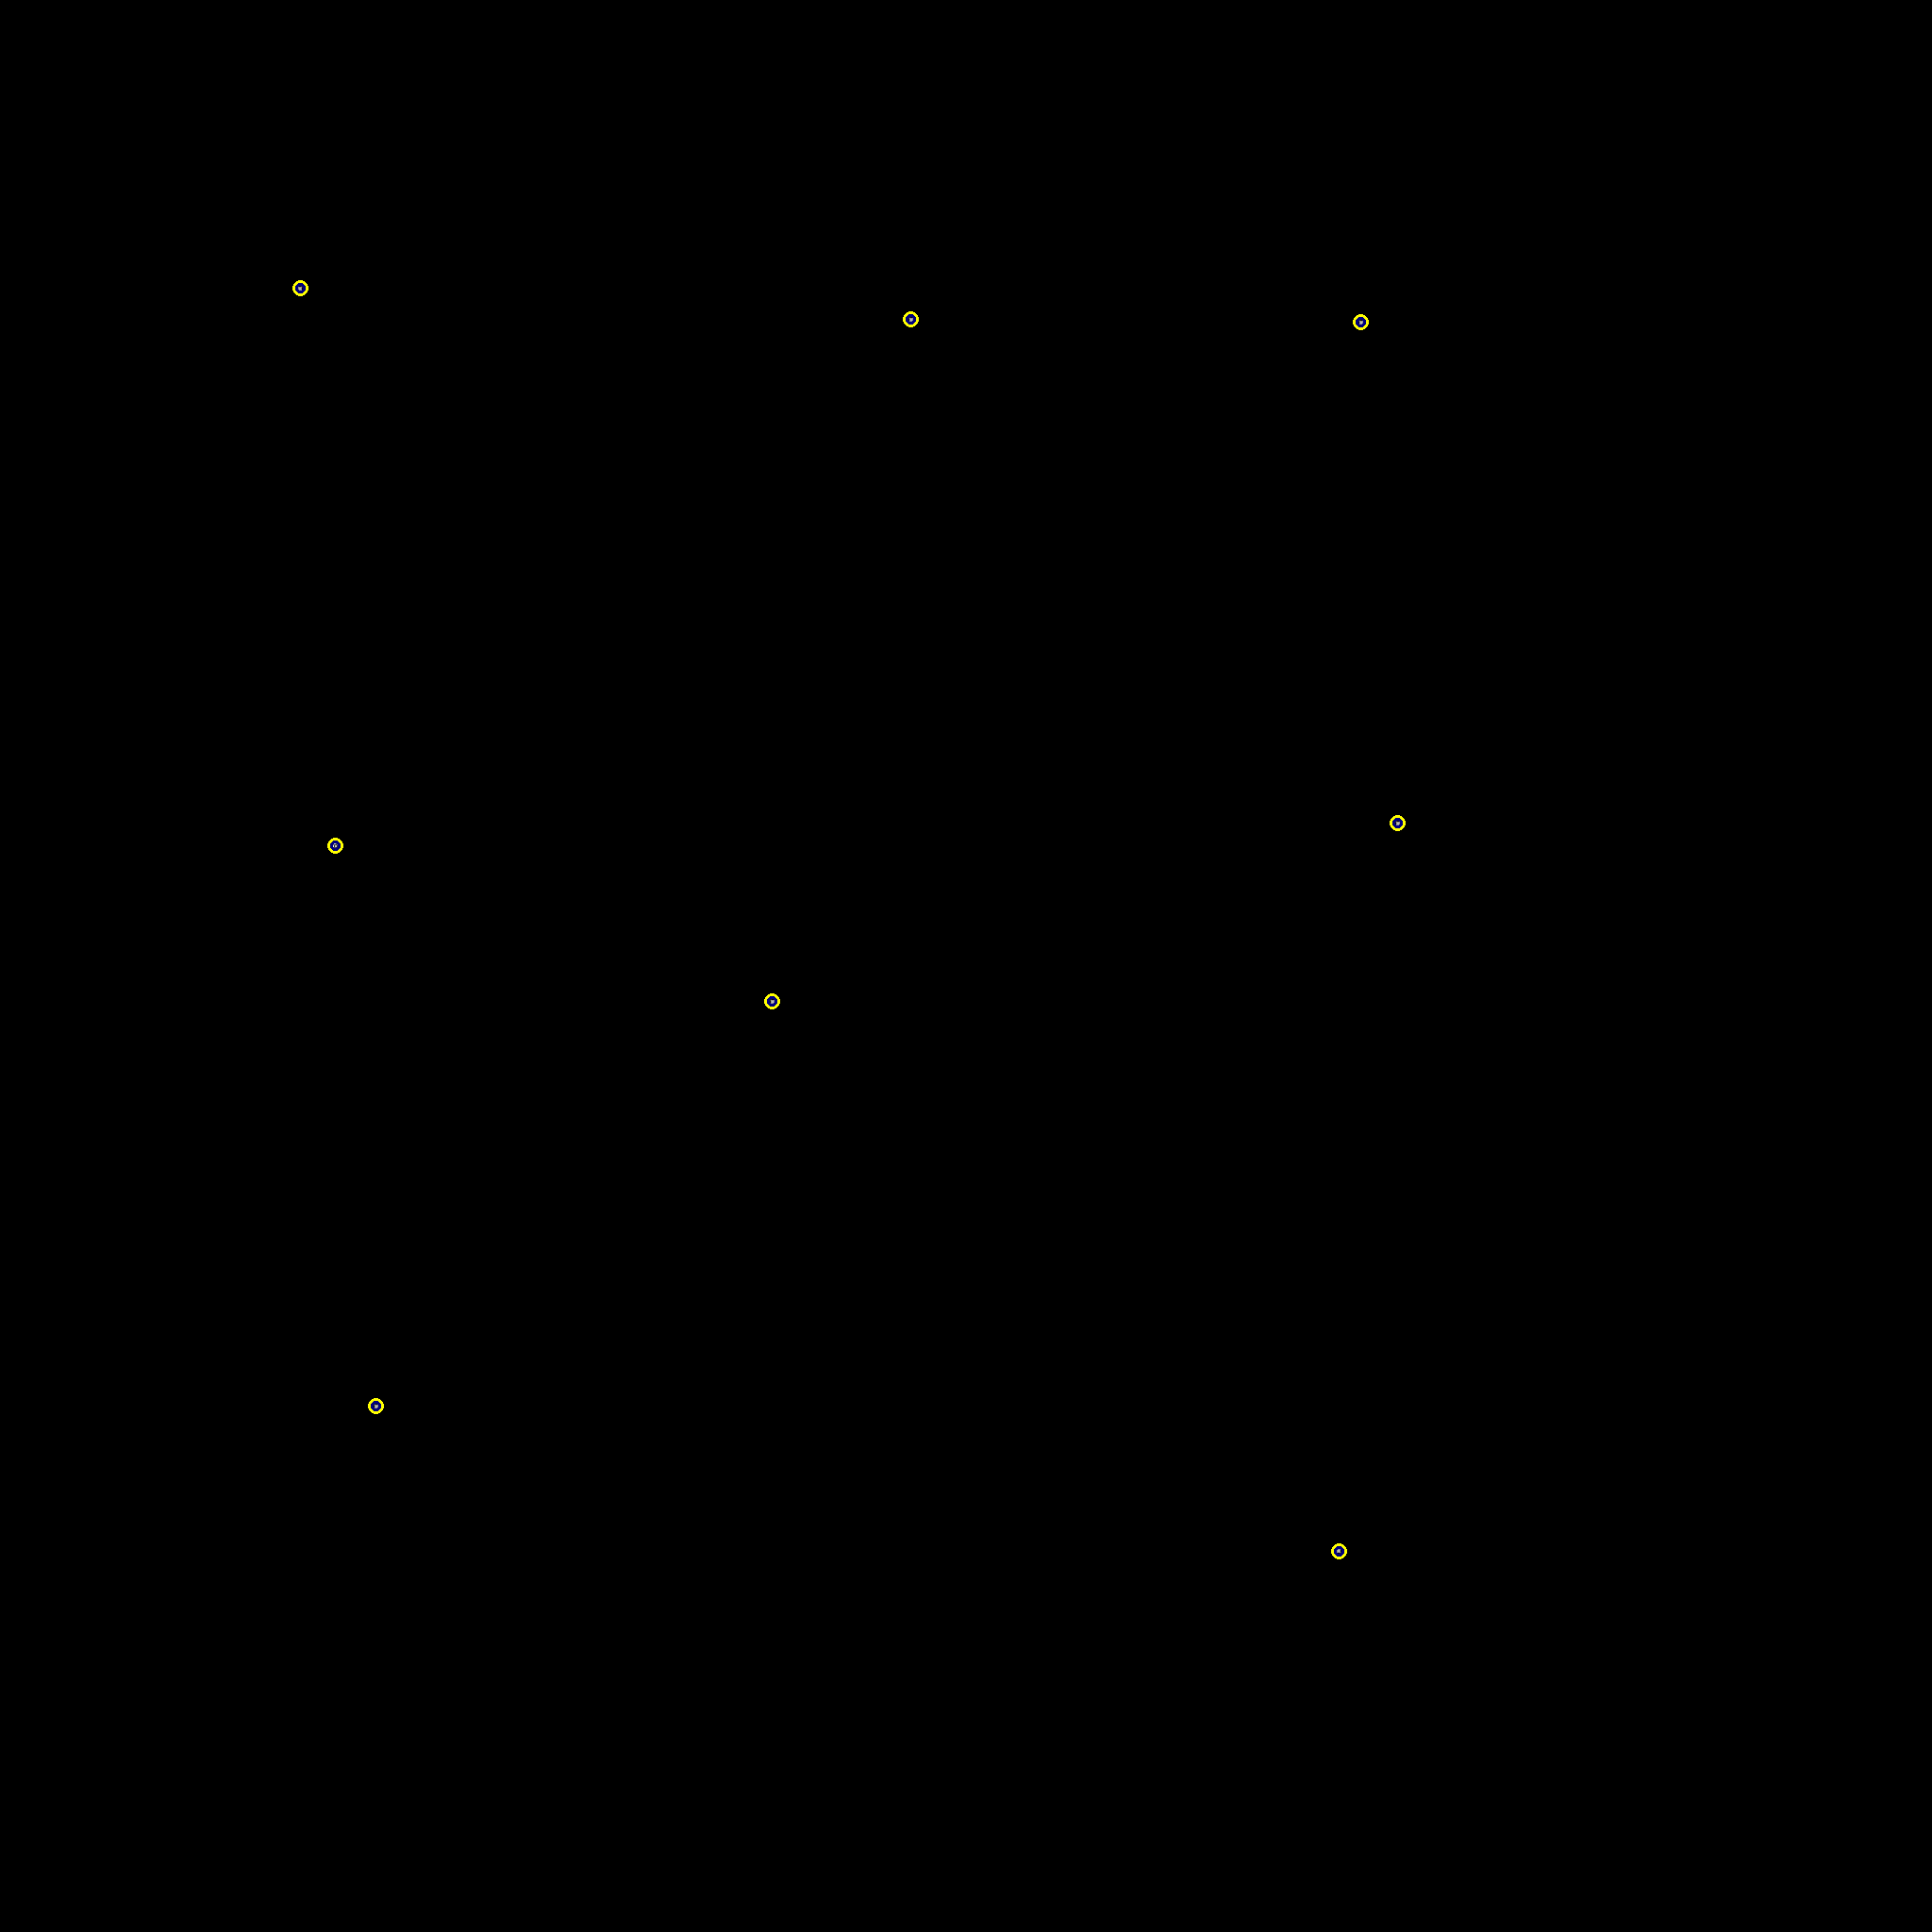

In [4]:
peak_finder.show_channel_peaks(situ_img, 0, img_show=False)

## Performing the registration

We perform the SituImageChannelRegistration with the FilterregRegistration functio and our initialized peak finder.
The transformations have to be applied manually after as the registration we are using does not do this automatically.

In [5]:
registration = SituImageChannelRegistration(FilterregRegistrationFunction(), peak_finder=peak_finder)
registration.do_channel_registration(situ_img)
situ_img.apply_transformations()

### Visualizing the result

We visualize the result by showing both images after each other. (Another approach not here implemented is to display both images on top of each other in different colours).

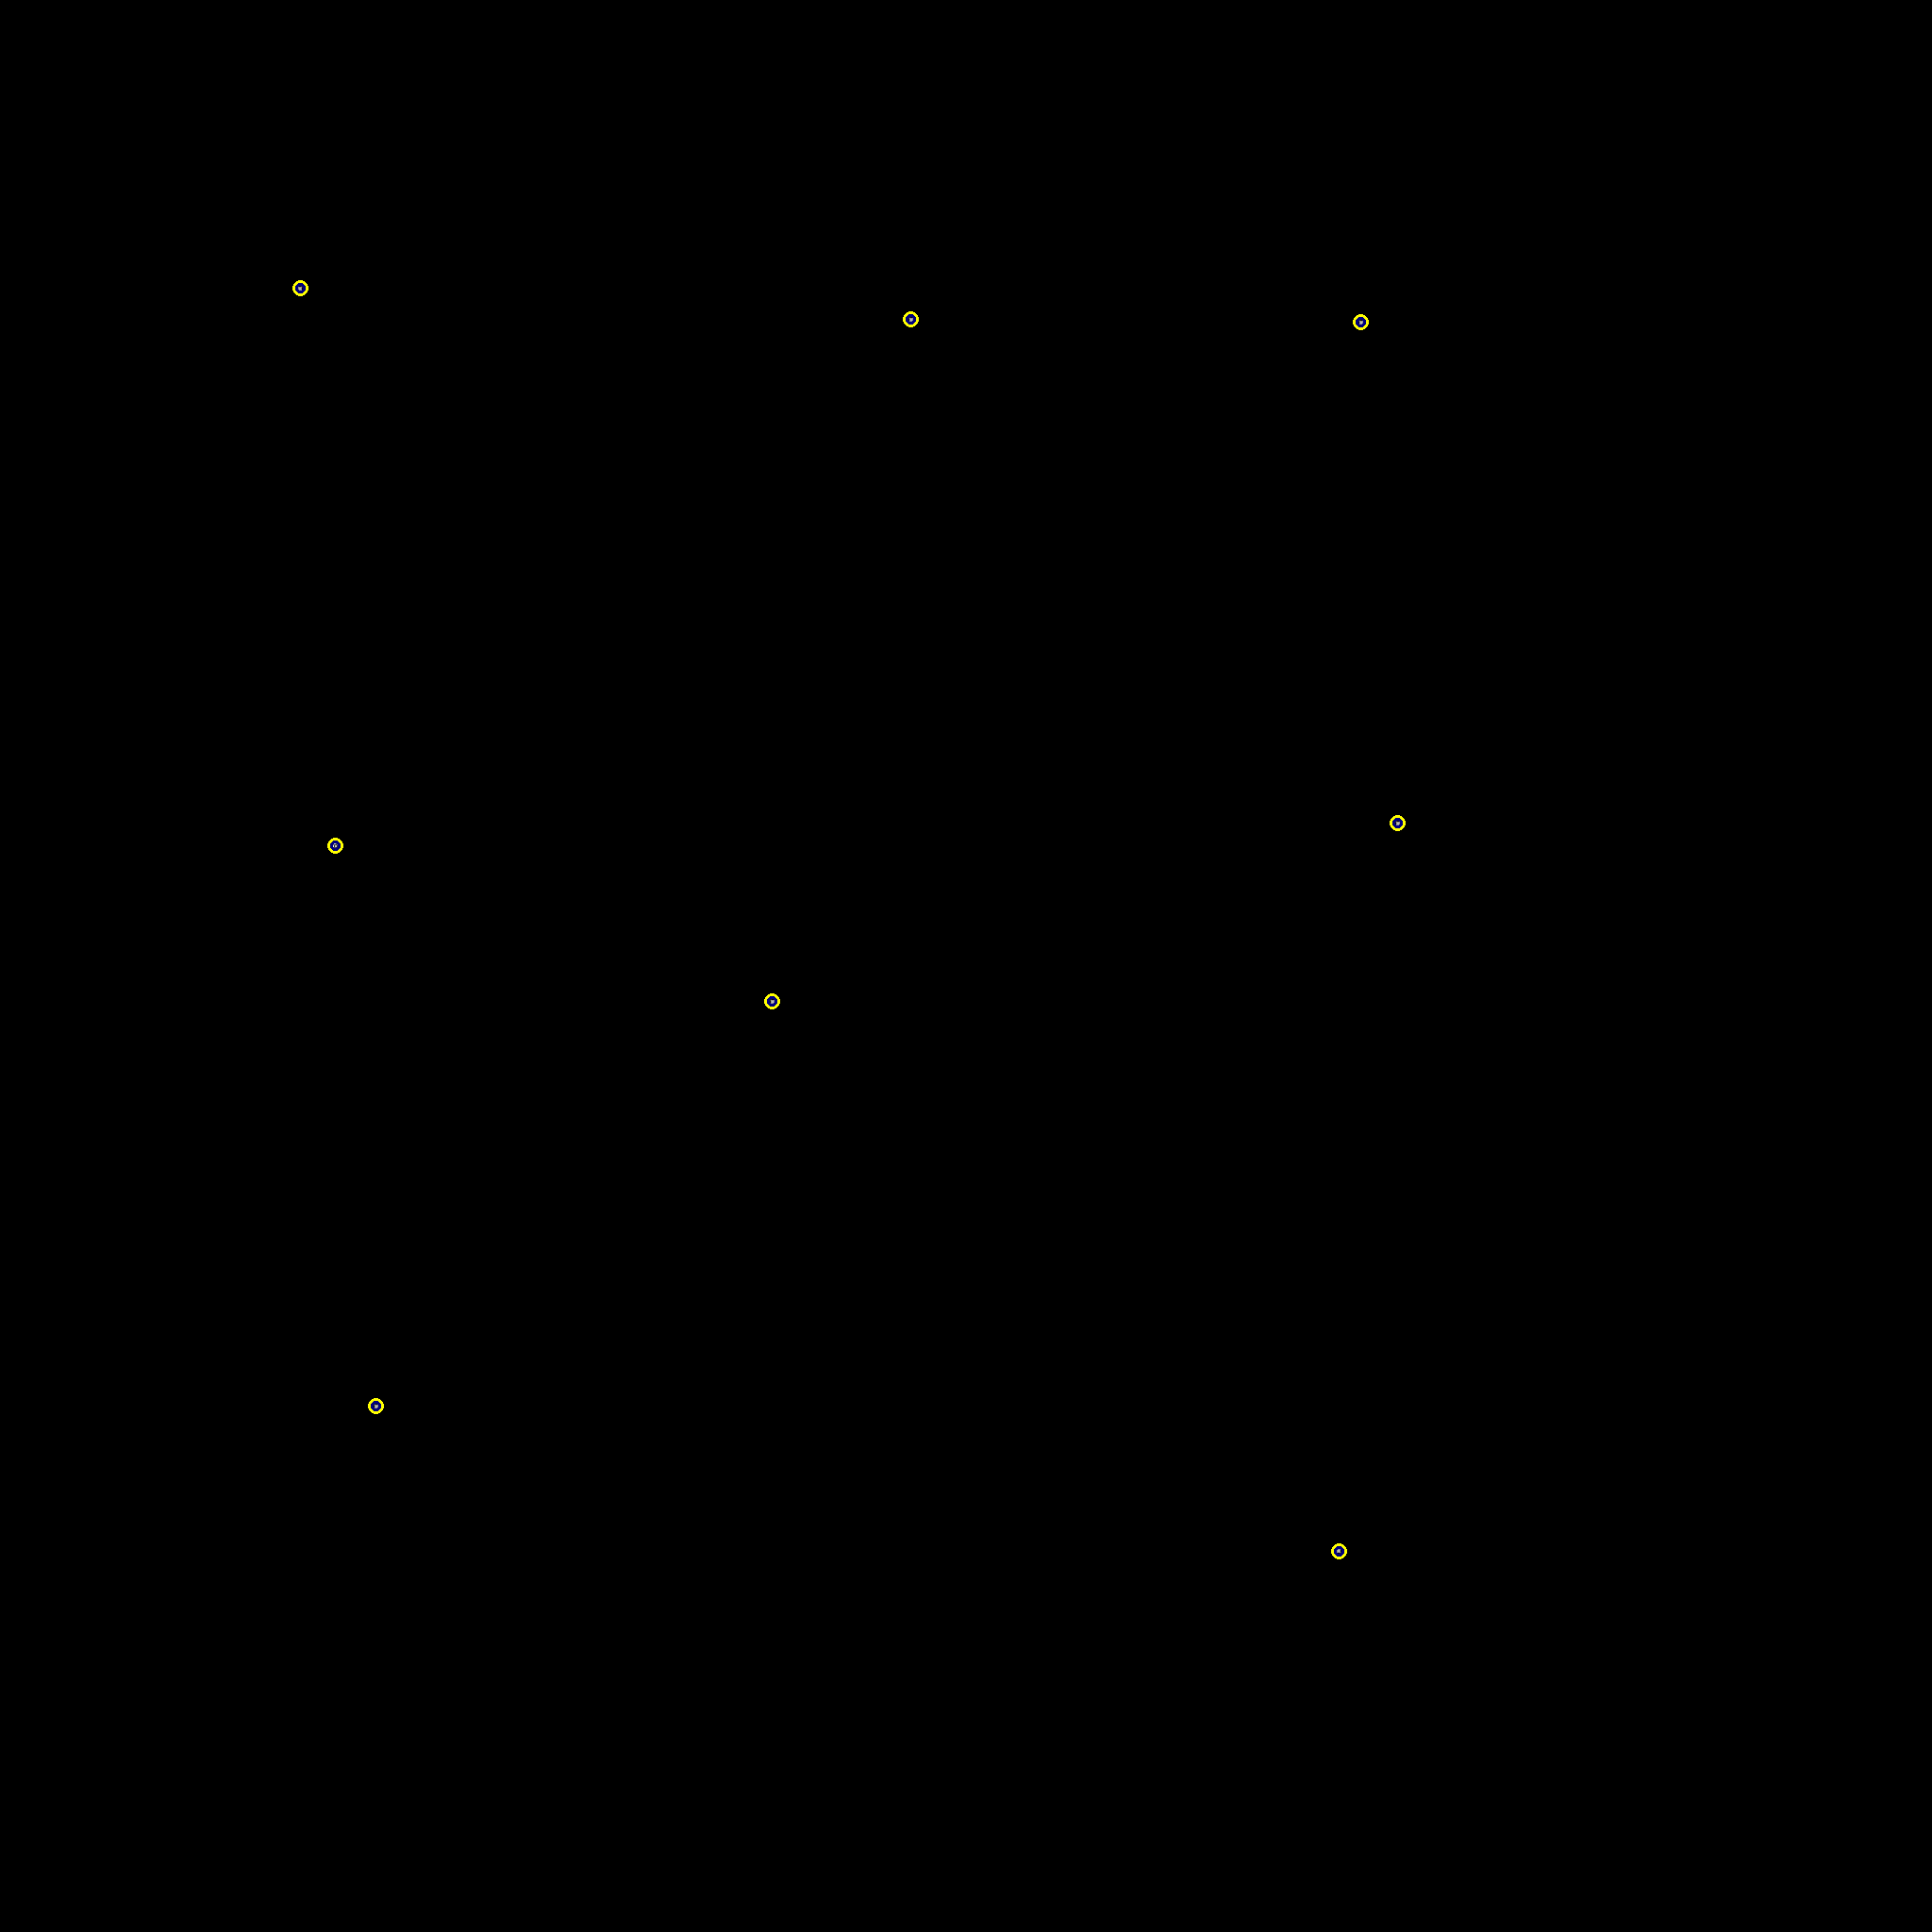

In [6]:
peak_finder.show_channel_peaks(situ_img, 0, img_show=False)

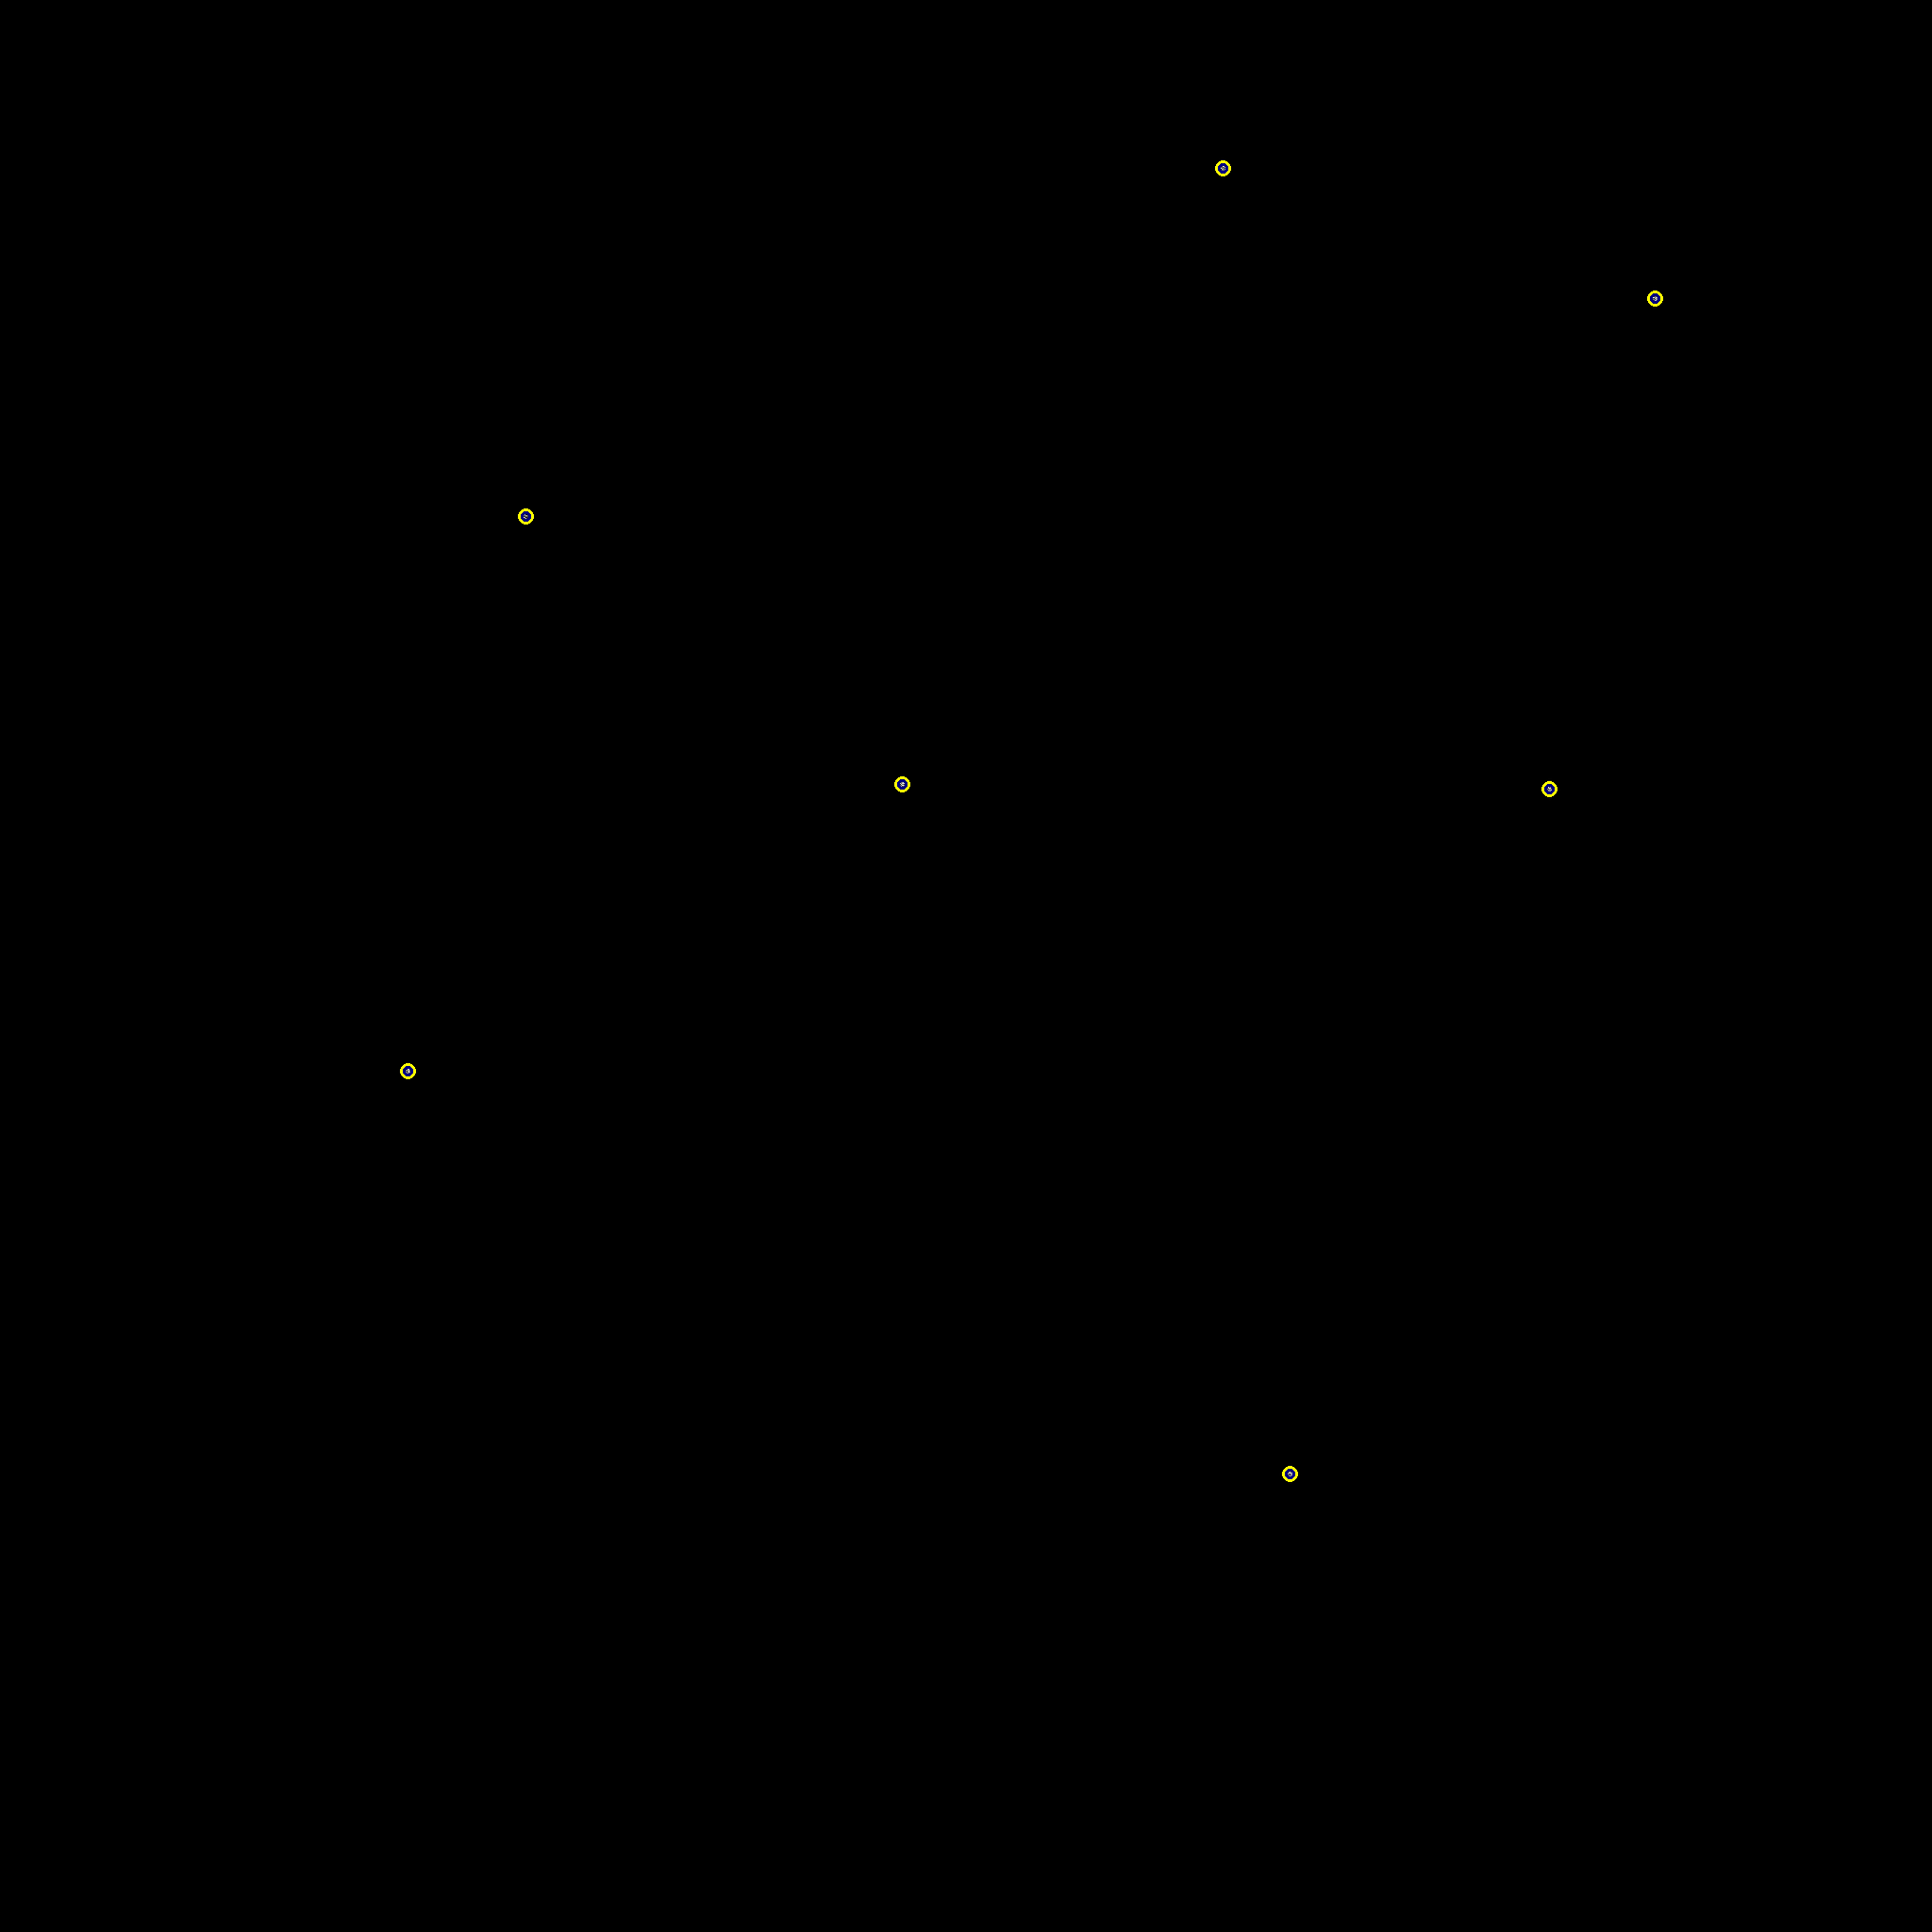

In [7]:
peak_finder.show_channel_peaks(situ_img, 1, img_show=False)

### Printing the transformation

The following code prints the transformation. This varies depending on the transformations.

In [8]:
print(situ_img.channel_transformations[1].offset)
print(situ_img.channel_transformations[1].scale)
print(situ_img.channel_transformations[1].transform_matrix)

[-192.46774087    4.13658823]
1.0
[[ 1.00000008e+00 -1.65431844e-04]
 [ 1.65431844e-04  1.00000008e+00]]
